In [10]:
ind_id = 'XGL6060-103'

In [12]:
from power_toys.components.inductor import Inductor
import numpy as np

ind = Inductor(ind_id)
print(ind.isat)
abc_new = np.array([[8.3, 0.2, 0.1], [14, 5, 1], [7, 8, 1], [1, 12, 0.5]])
for item in abc_new:
    loss = ind.predict_loss(item[0],item[1],item[2])
    print(loss)

7.3
Saturated by current
0
Saturated by current
0
Saturated by current
0
[nan nan]


In [3]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x



data = pd.read_csv(f"./power_toys/data/coilcraft_loss_for_training/{ind_id}.txt", header=None)
data = data[data[5]<200]
X = data.iloc[:, 0:3].values  # 输入值
y = data.iloc[:, 3:6].values  # 输出值

# 数据标准化
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)

# 加载模型
model = Net()
model.load_state_dict(torch.load(f'./power_toys/data/trained_model/coilcraft/{ind_id}.pth'))
model.eval()

# 自定义测试输入
inputs = torch.from_numpy(X_scaled).float()
outputs = model(inputs)

# 反标准化输出值
xyz_new = y_scaler.inverse_transform(outputs.detach().numpy())
for idx, item in enumerate(xyz_new):
    value = y[idx]
    if(value[0]+value[1]<1):
        continue
    print(f"DC: {np.abs(value[0]-item[0]):.2f}\tAC: {np.abs(value[1]-item[1]):.2f}\tTemp: {value[2]-item[2]}")

DC: 0.00	AC: 0.00	Temp: 0.2576903891032174
DC: 0.00	AC: 0.02	Temp: -0.283898668715139
DC: 0.00	AC: 0.00	Temp: -0.027529352510093474
DC: 0.00	AC: 0.00	Temp: 0.043804258128545825
DC: 0.00	AC: 0.03	Temp: -0.9572403737492934
DC: 0.00	AC: 0.00	Temp: -0.06863545965498474
DC: 0.00	AC: 0.03	Temp: 0.9108059918354741
DC: 0.00	AC: 0.02	Temp: -0.32575719944669856
DC: 0.00	AC: 0.02	Temp: 0.3779109325132879
DC: 0.00	AC: 0.01	Temp: 0.053510521992834015
DC: 0.00	AC: 0.00	Temp: -0.10174621176984999
DC: 0.00	AC: 0.00	Temp: 0.1734377512494163
DC: 0.00	AC: 0.00	Temp: 0.05515669726528927
DC: 0.00	AC: 0.02	Temp: 0.3192913702402649
DC: 0.00	AC: 0.02	Temp: -0.6198757861863413
DC: 0.00	AC: 0.00	Temp: 0.047496431064303124
DC: 0.00	AC: 0.02	Temp: -0.6521381418573071
DC: 0.00	AC: 0.02	Temp: 0.30499608404923606
DC: 0.00	AC: 0.00	Temp: -0.2105869752005276
DC: 0.00	AC: 0.01	Temp: -0.2858628436870845
DC: 0.00	AC: 0.00	Temp: 0.16743526165406308
DC: 0.00	AC: 0.01	Temp: 0.12138562729262503
DC: 0.00	AC: 0.01	Temp: 0.3916

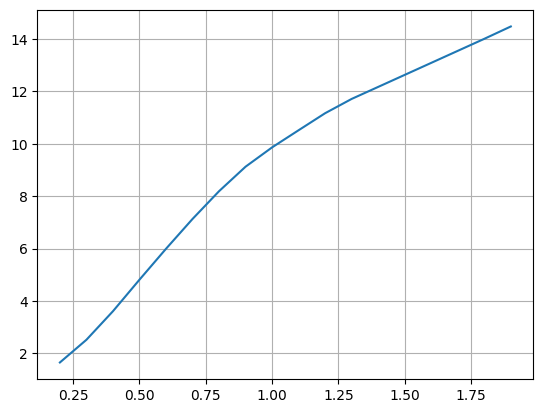

In [4]:
import matplotlib.pyplot as plt
freq = np.arange(0.2,2,0.1)
xyz_new = np.ones([len(freq),3])
xyz_new[:,0] = 5
xyz_new[:,1] =  5
xyz_new[:,2]  = freq
new_scaled = X_scaler.transform(xyz_new)
inputs = torch.from_numpy(new_scaled).float()
outputs = model(inputs)
xyz_out = y_scaler.inverse_transform(outputs.detach().numpy())
plt.plot(freq,xyz_out[:,1])
plt.grid()

In [5]:
ind.predict_AI(7.5,1.3,0.1)

array([ 1.007842  , -0.05119675, 49.964     ], dtype=float32)

In [8]:
print(ind.id_from_inductance(15e-6,"XGL6060"))

XGL6060-153


In [9]:
ind_id = 'XGL6060-103'
from power_toys.components.inductor import Inductor
import numpy as np

ind = Inductor(ind_id)
ind.predict_AI(66.667,4.4118,0.1)

array([ 12.702112 ,  -2.2744303, 349.846    ], dtype=float32)